In [3]:
%reload_ext autoreload
%autoreload 2

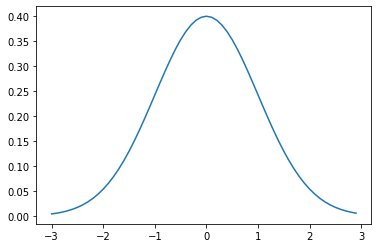

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from lib import onedim_gaussian_pdf


xs = np.arange(-3, 3, step=0.1)
ys = onedim_gaussian_pdf(xs, (0, 1))
plt.plot(xs, ys)

(2, 2)


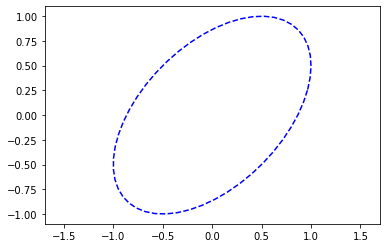

(2, 2)


array([[2.00660824, 2.00596669],
       [2.00596669, 3.0068215 ]])

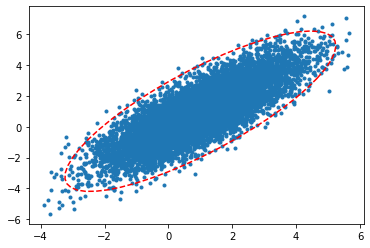

In [107]:
from lib import OneDimGaussian
from lib import plot_sigma_level

mu_theta = 1
sigma_sq_theta = 2
alpha = 1
sigma_sq_y = 1 / alpha
rho = 1

mean = np.array([mu_theta, mu_theta])
cov = np.array([
    [sigma_sq_theta, sigma_sq_theta*rho],
    [sigma_sq_theta*rho, sigma_sq_theta+sigma_sq_y]
])

theta_dist = OneDimGaussian(mu_theta, sigma_sq_theta)
thetas = theta_dist.sample(10000)
y_err_dist = OneDimGaussian(0, sigma_sq_y)
ys = thetas + y_err_dist.sample(len(thetas))

_, ax = plt.subplots()
ax.plot(thetas, ys, ".")
plot_sigma_level(ax, mean, cov, 3, "$p(y | \theta)$", "r")
np.cov(np.row_stack((thetas, ys)))

In [ ]:
from lib import OneDimGaussian
from lib import plot_sigma_level
mu_theta = 1
sigma_sq_theta = 2
alpha = 0.7
sigma_sq_y = 1 / alpha
mean = np.array([mu_theta, mu_theta])
cov = np.array([[sigma_sq_theta, rho],[rho, sigma_sq_theta + sigma_sq_y]])

theta_dist = OneDimGaussian(mu_theta, sigma_sq_theta)
thetas = theta_dist.sample(1000)
y_err_dist = OneDimGaussian(0, sigma_sq_y)
ys = thetas + y_err_dist.sample(len(thetas))

_, ax = plt.subplots()
ax.plot(thetas, ys, ".")
plot_sigma_level(ax, mean, cov, 3, "$p(y | \theta)$", "r")


array([[1.98063348, 2.00256168],
       [2.00256168, 3.0143242 ]])